## LSTM

In [ ]:
#@title 安裝 yfinance
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


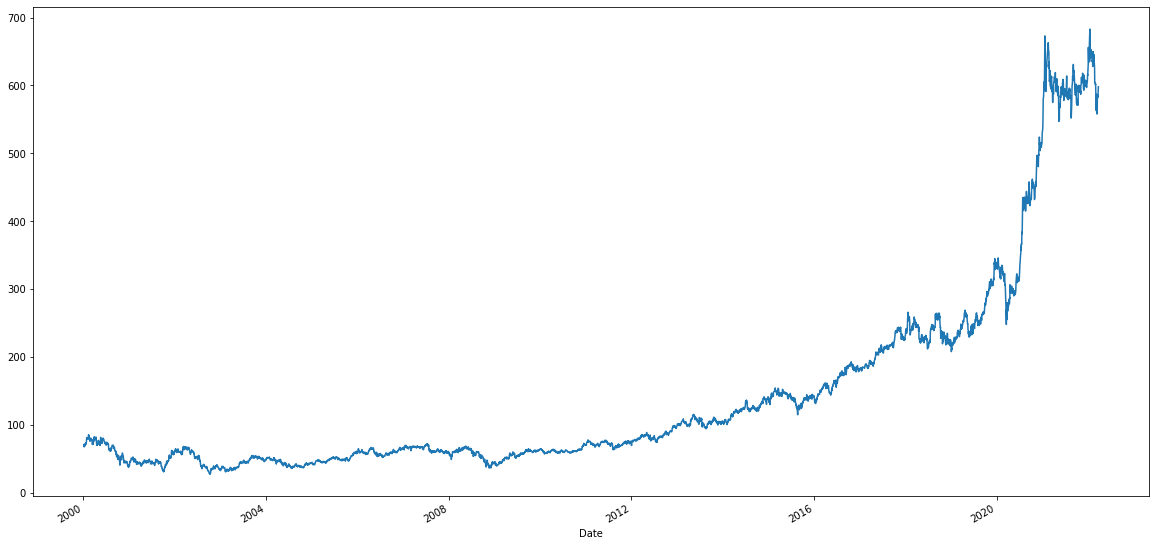

In [10]:
#@title 載入台積電股價資料
import yfinance as yf 
df = yf.download("2330.TW", "2000-01-01")
df['Close'].plot(kind = 'line', figsize = [20,10])

In [11]:
#@title 資料標準化
dataset = df[['Close']].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled  = sc.fit_transform(dataset)

In [15]:
#@title 將資料區分為訓練與測試資料集
import numpy as np
X_train = []
y_train = []
for i in range(60,4000):
  X_train.append(dataset_scaled[i-60:i ,0 ])
  y_train.append(dataset_scaled[i   ,0])


X_test = []
y_test = []

for i in range(4000 - 60,len(dataset_scaled)):
  X_test.append(dataset_scaled[i-60:i,0])
  y_test.append(dataset_scaled[i,0])


X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
print('training dataset:', X_train.shape, y_train.shape)
print('testing dataset:', X_test.shape, y_test.shape)

training dataset: (3940, 60) (3940,)
testing dataset: (1611, 60) (1611,)


In [16]:
#@title 建立 LSTM 模型
X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
#@title 模型訓練

regressor.compile(optimizer = 'adam', 
        loss = 'mean_squared_error')

regressor.fit(X_train, y_train, 
      epochs = 20, 
      batch_size = 32)

In [17]:
#@title 模型評估
pred_y = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred_y, y_test)
s = r2_score(pred_y, y_test)
print('MSE:', mse)
print('R2:', s)

MSE: 0.23552709411900236
R2: -18598.38058187834
